Connected to integrating (Python 3.11.5)

In [2]:
from PointList import *
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math


In [3]:
# from PointList import *
# from Triangle import *
# from tqdm import tqdm
# from copy import *


# class TriangularMesh:
#     def __init__(self, boundary : PointList, desired_triangle_count):
#         self.boundary = boundary 
#         self.m = desired_triangle_count
#         self.mesh = []
#         self.n = len(boundary.points)
#         self.v_indexes = [] #the vertexes indices
#         self.mapping = [] #contains the mapping from I(v_indexes) to R^3
#         self.triangles  = []  #each triangle is a tuple
#         self.inside_indexes  = []
#         self.N = {} #les indices des voisins 
#         self.N_vertexes = len(self.v_indexes) # the number of nodes in the meshing
#         self.w = np.empty((len(self.v_indexes),len(self.v_indexes)))
#         self.dict_vertexes = {} # contains the dict of all triangles associated to an index
#         self.edges = set()
#         self.vertex_curvatures = dict()
    

#     def add_points_to_boundary(self,N = 10):
#         "adding points to the boundary"
#         K = deepcopy(self.boundary.points)
#         R = []
#         for i in tqdm(range(len(self.boundary.points))):
            
#             p1 = K[i-1]
#             p2 = K[i]
#             L = list(np.linspace(p1,p2,N+2))[1:-1]

#             R.append(p1)
#             R = R + L
#         self.boundary.points = R
#         self.n = len(self.boundary.points)



#     def compute_central_point(self):
#         return self.boundary.average_point()
        
         
#     def create_initial_subdivisions(self):
#         #  Create initial subdivisions using the central point
#         C = self.compute_central_point()
#         s = int(self.m/(2*self.n) - 1/2)
#         triangle = self.boundary.points + [self.boundary.points[0]]
#         P = [triangle]
#         for j in range(1,s+1):
#             P_j = triangle + (j / (s+1))*(C - triangle)
#             P.append(P_j)
        
#         return np.array(P)
        

#     def create_quadrilaterals(self):
#         #split the outside quadrilaterals
#         P = self.create_initial_subdivisions()
#         s = int(self.m/(2*self.n) - 1/2)
#         for j in tqdm(range(s)) : 
#             for i in range(self.n) :
#                 self.mesh.append([P[j,i],P[j+1,i+1],P[j,i+1]])
#                 self.mesh.append([P[j,i],P[j+1,i+1],P[j+1,i]])
        
        


#     def split_quadrilateral(self):
#         C = self.compute_central_point()
#         P = self.create_initial_subdivisions()
#         for i in tqdm(range(self.n)) :
#             self.mesh.append([C,P[-1,i],P[-1,i+1]])

#     def further_subdivide(self):
#         while len(self.mesh) < self.m :
#             k = np.random.randint(0,len(self.mesh))
#             tri = np.array(self.mesh.pop(k))
#             C = np.mean(tri,axis = 0)
#             tri1 = [tri[0],tri[1],C]
#             tri2 = [tri[0],tri[2],C]
#             tri3 = [tri[1],tri[2],C]
#             self.mesh += [tri1,tri2,tri3]
    



#     def generate_mesh_initial(self):
#         self.create_quadrilaterals()
#         # self.further_subdivide()
#         return self.mesh


#     def modify_N(self,i):
#         N = []
#         for tr in self.triangles :
#             if i in tr:
#                 N += list(tr)
#         self.N[i] = list(set(N))
#         self.N[i].remove(i)


#     def canonic_representation_from_mesh(self):
#         K = np.array(self.mesh).reshape(-1,3)
#         K = [tuple(x) for x in K]
#         N = len(set(K))
#         self.N_vertexes = N
#         self.w = np.empty((N,N))
#         self.v_indexes = list(range(N))
#         self.mapping = list(set(K))
#         for j in self.v_indexes:
#             self.dict_vertexes[j] = []
#         self.triangles = []
#         for tri in self.mesh:
#             triangle = [self.mapping.index(tuple(pt)) for pt in tri]
#             self.triangles.append(tuple(sorted(triangle)))
#             self.dict_vertexes[triangle[0]].append(tuple(sorted(triangle)))
#             self.dict_vertexes[triangle[1]].append(tuple(sorted(triangle)))
#             self.dict_vertexes[triangle[2]].append(tuple(sorted(triangle)))

#         for i in self.v_indexes:
#             self.modify_N(i)

#         Outside = [tuple(k) for k in self.boundary.points]
#         Outside_vertexes = [self.mapping.index((pt)) for pt in Outside]
#         self.inside_indexes = list(set(self.v_indexes) - set(Outside_vertexes))

    
#     def tuple_mapping(self):
#         self.mapping = [tuple(k) for k in self.mapping]

            
#     def clean_triangles(self):
#         pass

#     def area_3D(self,tr):
#         v = [self.mapping[tr[0]],self.mapping[tr[1]],self.mapping[tr[2]]]
#         return area_3D(v)


#     def _N(self,i):
#         N = []
#         for tr in self.triangles :
#             if i in tr:
#                 N += list(tr)
#         return list(set(N))








#     def cotangent_angle(self, p1, p2, p3):
#         """Compute the cotangent of the angle between p1-p2 and p1-p3."""
#         v1 = np.array(self.mapping[p2]) - np.array(self.mapping[p1])
#         v2 = np.array(self.mapping[p3]) - np.array(self.mapping[p1])
#         dot_product = np.dot(v1, v2)
#         cross_product_norm = np.linalg.norm(np.cross(v1, v2))
#         return dot_product / cross_product_norm

#     def voronoi(self,p1,p2,p3):
#         """Compute vornoi area at point p"""

#         p = np.array(self.mapping[p1])
#         q = np.array(self.mapping[p2])
#         r = np.array(self.mapping[p3])
#         pr = np.linalg.norm(p-r)**2
#         pq = np.linalg.norm(p-q)**2
#         cot_q = self.cotangent_angle(p2,p3,p1)
#         cot_r = self.cotangent_angle(p3,p1,p2)
    
#         return (pr*cot_q + pq*cot_r)/8
    

#     def is_obtuse(self,p1, p2,p3):
#         v1 = self.mapping[p1]
#         v2 = self.mapping[p2]
#         v3 = self.mapping[p3]
#         # Compute squared lengths of the sides
#         a2 = (v2[0]-v3[0])**2 + (v2[1]-v3[1])**2 + (v2[2]-v3[2])**2
#         b2 = (v1[0]-v3[0])**2 + (v1[1]-v3[1])**2 + (v1[2]-v3[2])**2
#         c2 = (v1[0]-v2[0])**2 + (v1[1]-v2[1])**2 + (v1[2]-v2[2])**2

#         # Check if any angle is obtuse
#         return a2 > b2 + c2 or b2 > a2 + c2 or c2 > a2 + b2


#     def obtuse_at_point(self,p1, p2,p3):
#         v1 = self.mapping[p1]
#         v2 = self.mapping[p2]
#         v3 = self.mapping[p3]
#         # Compute squared lengths of the sides
#         a2 = (v2[0]-v3[0])**2 + (v2[1]-v3[1])**2 + (v2[2]-v3[2])**2
#         b2 = (v1[0]-v3[0])**2 + (v1[1]-v3[1])**2 + (v1[2]-v3[2])**2
#         c2 = (v1[0]-v2[0])**2 + (v1[1]-v2[1])**2 + (v1[2]-v2[2])**2

#         # Check if any angle is obtuse
#         return a2 > b2 + c2 
    

#     def mixed_area(self,v1,v2,v3):
#         " calculate the voronoi mixed area at v1 "
#         if not self.is_obtuse(v1,v2,v3): # checks that the triangle is not obtuse
#             return self.voronoi(v1,v2,v3)
#         else:
#             tr = (v1,v2,v3)
#             if self.obtuse_at_point(v1,v2,v3):
                
#                 return self.area_3D(tr)/2
#             else:
#                 return self.area_3D(tr)/4

#     def voronoi_area(self, vertex):
#         """Compute the total area of triangles adjacent to the vertex."""
#         area = 0
    
#         triangles = self.dict_vertexes[vertex]
#         for tri in triangles:
#             v1 = vertex
#             v2 = [a for a in tri if a != vertex][0]
#             v3 = [a for a in tri if a != vertex][1]
#             tr = (v1,v2,v3)
#             area += self.area_3D(tr)
#         return area


#     def compute_mean_curvature(self):
#         """Compute the mean curvature for each vertex in the mesh."""
#         self.vertex_curvatures = dict()
#         for i in self.inside_indexes:

#             A_i = self.voronoi_area(i) #We do it with simple area
#             curvature_sum = np.zeros(3)
#             B_i  = 0
#             for j in self.N[i]:
                
#                 tr_i = set(self.dict_vertexes[i])
#                 tr_j = set(self.dict_vertexes[j])

#                 t1= list(tr_i.intersection(tr_j))[0]
#                 t2= list(tr_i.intersection(tr_j))[1]
                

#                 alpha = [r for r in t1 if r not in (i,j)][0]
#                 beta = [r for r in t2 if r not in (i,j)][0]

#                 cot_alpha = self.cotangent_angle(alpha,i,j)
#                 cot_beta = self.cotangent_angle(beta,j,i)

#                 p_i = np.array(self.mapping[i]) 
#                 p_j = np.array(self.mapping[j]) 

#                 curvature_sum += (cot_alpha + cot_beta) *(p_j - p_i)
                
#                 if A_i < 0:
#                     print(A_i,i)
#                     raise Exception("Error this area si negative !!!")
                    

            
#             h_i = np.linalg.norm(curvature_sum) / (4 * A_i)
#             self.vertex_curvatures[h_i] = i
#         A = np.array(list(self.vertex_curvatures.keys()))
        
#         return np.max(A)



## The Catenoid loop

In [3]:
R = []
S2 = []
S1 = []
S3 = []
S4 = []

U = np.linspace(-3*np.pi/5,3*np.pi/5,2)
V = np.linspace(-2,2,15)
polygone = PointList()

for u in [-3*np.pi/5]  :
    for v in V :
        S2.append((np.cosh(v)*np.cos(u),np.cosh(v)*np.sin(u),v))
S2.reverse()
for u in [3*np.pi/5]  :
    for v in V :
        S3.append((np.cosh(v)*np.cos(u),np.cosh(v)*np.sin(u),v))


U = np.linspace(-3*np.pi/5,3*np.pi/5,65)
V = np.linspace(-2,2,2)

for u in U :
    for v in [-2] :
        S1.append((np.cosh(v)*np.cos(u),np.cosh(v)*np.sin(u),v))

for u in U :
    for v in [2] :
        S4.append((np.cosh(v)*np.cos(u),np.cosh(v)*np.sin(u),v))

S4.reverse()



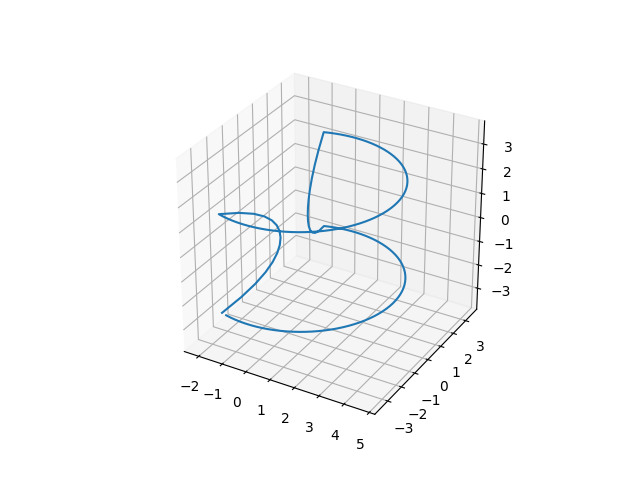

In [4]:
X = []
Y = []
Z = []
S = S1[1:] + S3[1:] + S4[1:] + S2[1:] 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

L = np.array(S)
xs = L[:,0]
ys = L[:,1]
zs = L[:,2]

X = X + list(xs)
Y = Y + list(ys)
Z = Z + list(zs)

plt.plot(xs,ys,zs)


X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)


polygone.points = S


In [5]:
# #class of updating_Laplace 
# def distance(point1, point2):
#     """Compute the Euclidean distance between two points."""
#     return np.linalg.norm(np.array(point1) - np.array(point2))

# def perimeter_3D(vertices):
#     """Compute the perimeter of a triangle given its vertices."""
#     return distance(vertices[0], vertices[1]) + distance(vertices[1], vertices[2]) + distance(vertices[0], vertices[2])


# class Updating_Laplace(TriangularMesh):
#     def __init__(self, boundary : PointList, desired_triangle_count):
#         super().__init__(boundary, desired_triangle_count)

#     def S(self,i,j):
#         S = 0
#         tr_i = set(self.dict_vertexes[i])
#         tr_j = set(self.dict_vertexes[j])
#         intersect = list(tr_i.intersection(tr_j))
#         if len(intersect) != 2:
#             print(intersect)
#             raise Exception("Sorry, it should have only two adjacent triangles")
#         for tr in intersect :
#             S+= self.area_3D(tr)
#         return S


#     def calcul_weights(self,i,j) :
#         S = 0
#         for k in self.N[i]:
#             S += (self.S(i,k))
        
#         self.w[i,j] =  (self.S(i,j))/S
#         if math.isnan(self.w[i,j]):
#             print(i,j)
#             raise ValueError("S is nega tive")


         


#     def update_weights(self):
#         "Updates the weights of the Mesh for each iteration"
#         for j in self.inside_indexes:
#             for i in self.N[j] :
#                 self.calcul_weights(j,i)
                

#     def calculate_area(self):
#         "Calculates the area of the meshing"
#         S = 0
#         for tri in self.triangles:
#             S = S + self.area_3D(tri)
#         return S

#     def update_mapping(self,i):
#         "Updates the position of the nodes using the Laplace Fairing"
#         N_i = self.N[i]
#         P = np.array([0,0,0])
#         for k in N_i :
#             P = P + (self.w[i,k])*np.array(self.mapping[k])
        
#         self.mapping[i] = P

#         for k in N_i:
#             self.calcul_weights(i,k)

            
    
        



        

NameError: name 'TriangularMesh' is not defined

In [8]:
# class Edge_Flipping(Updating_Laplace):
#     def __init__(self, boundary : PointList, desired_triangle_count):
#         super().__init__(boundary, desired_triangle_count)
#         self.dict_edges = dict()
#         self.L = {}
#         self.L_replaced = {}
#         self.mapping_area = deepcopy(self.mapping)

#     def fill_edges(self):
#         self.edges = set()
#         for tri in self.triangles:
#             for i in range(3):
#                 edge = tuple(sorted([tri[i], tri[(i+1)%3]]))
#                 self.edges.add(edge)
#                 self.dict_edges[edge] = -1

#     def test(self,edge,tri):
#         return set(edge).issubset(set(tri))
    
#     def can_flip(self,edge):
#         triangles = [tuple(set(sorted(triangle)))  for triangle in self.triangles if self.test(edge,triangle)]
#         return len(set(triangles)) == 2
    
#     def flip_edge(self,edge):

#         old_triangles = [triangle for triangle in self.triangles if self.test(edge,triangle)]
#         t1,t2 = old_triangles
#         opposite_vertices = [v for v in t1 if v not in edge] + [v for v in t2 if v not in edge]
#         new_triangles = [tuple(sorted([edge[0], opposite_vertices[0], opposite_vertices[1]])), 
#                      tuple(sorted([edge[1], opposite_vertices[0], opposite_vertices[1]]))]
#         return old_triangles,new_triangles
    
#     def lawson_flip(self):

#         swaped = True
#         ll = len(self.edges)

#         while swaped :
            
#             swaped = False

#             for edge in (self.edges):
#                 if self.can_flip(edge):

#                     old_tr, new_tr = self.flip_edge(edge)
#                     old_area = sum(self.area_3D(triangle) for triangle in old_tr)
#                     new_area = sum(self.area_3D(triangle) for triangle in new_tr)
                    
#                     R = set(np.array(new_tr).reshape(-1))
#                     edge1 = tuple(sorted([a for a in R if a not in edge]))
                    
#                     if new_area < old_area and edge1 not in self.edges :
#                         # print("this edge.{} was swapped with this one {} resulting in an area minimization of {}".format(edge,edge1,old_area-new_area))
#                         # D = D + new_area - old_area
#                         # print("hat")
                        
#                         swaped = True

#                         self.edges.add(edge1)
#                         self.edges.remove(edge)

#                         for tr in new_tr:
#                             self.triangles.append(tr)
                        
#                         for tr in old_tr :
#                             self.triangles.remove(tr)

#                         for tr in new_tr:
#                             for pt in tr:
#                                 self.dict_vertexes[pt].append(tuple(sorted(tr)))
                        
#                         for tr in old_tr:
#                             for pt in tr:
#                                 self.dict_vertexes[pt].remove(tuple(sorted(tr)))

                        
#                         a,b = edge
#                         a1,b1 = edge1

#                         self.N[a1].append(b1)
#                         self.N[b1].append(a1)

#                         self.N[a].remove(b)
#                         self.N[b].remove(a)  
                                              
#                     self.L[edge] = (new_area -  old_area, old_tr, new_tr,edge)
#                     if len(list(self.edges)) < ll:
#                         print(edge,edge1)
                
#     def C_inversed(self,h):
#         "Computes the inversed C matrix of index h"
#         identity_matrix = np.identity(3)
#         C = 0

#         for tr in self.dict_vertexes[h]:

#             j,k = tuple([a for a in tr if a != h ])
#             P_j = np.array(self.mapping[j])
#             P_k = np.array(self.mapping[k])
#             P_h = np.array(self.mapping[h])

#             # Assuming P_j * P_k is element-wise multiplication
#             vect_jk = (P_k - P_j)
#             vect_jh = (P_h - P_j)

#             # Numerator part
#             numerator = (np.linalg.norm(vect_jk)**2)*identity_matrix  - np.outer(vect_jk, vect_jk.T)

#             # Cross product for denominator
#             cross_product = np.cross(vect_jk, vect_jh)

#             # Update C with the contribution from this triplet
#             C += numerator / np.linalg.norm(cross_product)

#         return np.linalg.inv(C)
    
#     def update_mapping_area(self,h):
#         "Update the position of h to minimze the said area"
#         P_bar_h = np.zeros(3)
#         for tr in self.dict_vertexes[h]:
#             j,k = tuple([a for a in tr if a != h ])
#             P_j = np.array(self.mapping[j])
#             P_k = np.array(self.mapping[k])
#             P_h = np.array(self.mapping[h])

#             vect_jk = P_k - P_j
#             vect_jh = P_h - P_j

#             dot_product_jk_j = np.dot(vect_jk, P_j)  # Dot product
#             cross_product_jk_jh = np.cross(vect_jk, vect_jh)  # Cross product

#             # The term inside the summation
#             term = (np.dot(dot_product_jk_j,vect_jk) - np.dot(np.linalg.norm(vect_jk)**2 , P_j)) / np.linalg.norm(cross_product_jk_jh)

#             # Summation
#             P_bar_h += term

#         # Multiply with the inverse of C
#         P_bar_h = -np.dot(self.C_inversed(h), P_bar_h)
#         self.mapping[h] =  P_bar_h


In [6]:
from Final_surface import *

In [7]:
#intialize the first mesh
from copy import *

polygone = PointList()
for k in S:
    polygone.add_point(k)
""
M = Edge_Flipping(polygone,2040)
# M.add_points_to_boundary(N = 5)
M.create_quadrilaterals()
M.split_quadrilateral()

M.canonic_representation_from_mesh()
M.clean_triangles()
M.fill_edges()

Outside = [tuple(k) for k in M.boundary.points]
Outside_vertexes = [M.mapping.index((pt)) for pt in Outside]
Inside_vertexes = list(set(M.v_indexes) - set(Outside_vertexes))

centre = M.compute_central_point()
centre = tuple(centre)
ind = M.mapping.index(centre)
triangle_centre = M.dict_vertexes[ind]
M.update_weights()
# Fliaring Laplace 
# epsilon = 0.01
# area = M.calculate_area()
# M.update_weights()
# for i in Inside_vertexes:
#     M.update_mapping(i)
# M.lawson_flip()

# new_area = M.calculate_area()
# while area - new_area >= epsilon:
#     area = M.calculate_area()
#     M.update_weights()
#     for i in Inside_vertexes:
#         M.update_mapping(i)
#     M.lawson_flip()
    
#     new_area = M.calculate_area()
    
#     print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])


# # # M.canonic_representation()
M.compute_mean_curvature()


100%|██████████| 156/156 [00:00<00:00, 638976.00it/s]

2.218579819429307

In [8]:
epsilon = 0.01
area = M.calculate_area()
print(len(M.triangles))
for i in tqdm(M.inside_indexes):
    M.update_mapping(i)
D = M.lawson_flip()
new_area = M.calculate_area()
print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])

while  area - new_area > epsilon:
    area = M.calculate_area()
    M.update_weights()
    for i in tqdm(M.inside_indexes):
        M.update_mapping(i)
    
    M.lawson_flip()
    new_area = M.calculate_area()

    print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])


2028


100%|██████████| 937/937 [00:00<00:00, 1235.36it/s]


62.49608309663338 0.41364116828314934 1.4586458688148642 619


100%|██████████| 937/937 [00:00<00:00, 2104.10it/s]


62.012485515459076 0.4835975811743012 6.552900405810961 385


100%|██████████| 937/937 [00:00<00:00, 2143.00it/s]


61.541038609640104 0.4714469058189721 2.034366181961819 214


100%|██████████| 937/937 [00:00<00:00, 2146.11it/s]


61.17634690408651 0.36469170555359653 1.2860119099168792 360


100%|██████████| 937/937 [00:00<00:00, 2168.32it/s]


60.89740245795818 0.27894444612832814 1.1030972878248353 69


100%|██████████| 937/937 [00:00<00:00, 2135.98it/s]


60.665081526956435 0.23232093100174467 0.8955650445599219 172


100%|██████████| 937/937 [00:00<00:00, 2105.79it/s]


60.47276208295336 0.19231944400307555 0.8793938150877423 172


100%|██████████| 937/937 [00:00<00:00, 2119.10it/s]


60.306004751945686 0.16675733100767332 0.8445258132262486 172


100%|██████████| 937/937 [00:00<00:00, 2150.02it/s]


60.158826827193096 0.14717792475259017 0.7976027424612284 172


100%|██████████| 937/937 [00:00<00:00, 2139.21it/s]


60.027820150221544 0.13100667697155188 0.733603699602514 172


100%|██████████| 937/937 [00:00<00:00, 2180.21it/s]


59.91346915303682 0.1143509971847223 0.7871509425316299 255


100%|██████████| 937/937 [00:00<00:00, 2134.60it/s]


59.81011362655016 0.10335552648665924 0.6749801476539987 172


100%|██████████| 937/937 [00:00<00:00, 2146.37it/s]


59.71829610371613 0.09181752283403455 0.7006031821396504 26


100%|██████████| 937/937 [00:00<00:00, 2139.65it/s]


59.63529102239374 0.0830050813223906 0.5937860992180375 172


100%|██████████| 937/937 [00:00<00:00, 2130.41it/s]


59.560479714813326 0.07481130758041132 0.6410432559841349 172


100%|██████████| 937/937 [00:00<00:00, 2139.92it/s]


59.49351527479569 0.06696444001763524 0.510366254247036 172


100%|██████████| 937/937 [00:00<00:00, 2140.33it/s]


59.432651777158156 0.06086349763753418 0.5468428812576203 255


100%|██████████| 937/937 [00:00<00:00, 2135.55it/s]


59.378500996322146 0.05415078083601088 0.4248841105062745 76


100%|██████████| 937/937 [00:00<00:00, 2120.28it/s]


59.32684908647026 0.05165190985188417 0.6205845618246735 531


100%|██████████| 937/937 [00:00<00:00, 2130.44it/s]


59.281067670070996 0.04578141639926514 0.3916950597497194 76


100%|██████████| 937/937 [00:00<00:00, 2110.45it/s]


59.23832690000671 0.04274077006428456 0.4266077631829543 532


100%|██████████| 937/937 [00:00<00:00, 2145.25it/s]


59.202088785599834 0.03623811440687774 0.3418909244988386 11


100%|██████████| 937/937 [00:00<00:00, 2140.00it/s]


59.167420141248066 0.03466864435176831 0.30637990425383854 394


100%|██████████| 937/937 [00:00<00:00, 2134.11it/s]


59.138420335364174 0.028999805883891838 0.46625280077499764 317


100%|██████████| 937/937 [00:00<00:00, 2116.16it/s]


59.1139891642859 0.024431171078276748 0.4114228683892281 255


100%|██████████| 937/937 [00:00<00:00, 2119.72it/s]


59.09268087922927 0.02130828505662663 0.36954323724706545 814


100%|██████████| 937/937 [00:00<00:00, 2119.30it/s]


59.07319037465138 0.019490504577888146 0.92487451633808 255


100%|██████████| 937/937 [00:00<00:00, 2074.83it/s]


59.051697429171114 0.021492945480268588 0.35178587503990894 192


100%|██████████| 937/937 [00:00<00:00, 2072.28it/s]


59.03838943827316 0.013307990897956756 2.4079011600636018 736


100%|██████████| 937/937 [00:00<00:00, 2089.81it/s]


59.01982792909868 0.018561509174475077 0.28800576972302677 214


100%|██████████| 937/937 [00:00<00:00, 2138.35it/s]


59.00820344345888 0.011624485639799786 0.3526105625278253 374


100%|██████████| 937/937 [00:00<00:00, 2080.10it/s]


58.99541153960969 0.012791903849191044 0.49015191196608465 76


100%|██████████| 937/937 [00:00<00:00, 2089.44it/s]


58.98114319510767 0.01426834450202108 0.5732899712482146 194


100%|██████████| 937/937 [00:00<00:00, 2112.82it/s]


58.96951864978664 0.011624545321026858 0.37811647363295803 601


100%|██████████| 937/937 [00:00<00:00, 2074.76it/s]


58.95612074294295 0.013397906843692908 0.5639540357177004 374


100%|██████████| 937/937 [00:00<00:00, 2117.68it/s]


58.947838647126595 0.008282095816355195 0.2540661707186434 11


In [9]:
epsilon = 0.001
area = M.calculate_area()
print(len(M.triangles))
for i in tqdm(M.inside_indexes):
    M.update_mapping_area(i)
D = M.lawson_flip()
new_area = M.calculate_area()
print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])

while  area - new_area > 0.01:
    area = M.calculate_area()
    for i in tqdm(M.inside_indexes):
        M.update_mapping_area(i)
    M.lawson_flip()
    new_area = M.calculate_area()

    print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])


2028


100%|██████████| 937/937 [00:00<00:00, 1622.58it/s]


58.9317743368019 0.01606431032469402 0.2028437536610333 69


100%|██████████| 937/937 [00:00<00:00, 1877.52it/s]


58.92357684715397 0.008197489647933764 0.17016130273389812 374


(-3.76147049205584, 3.76147049205584)

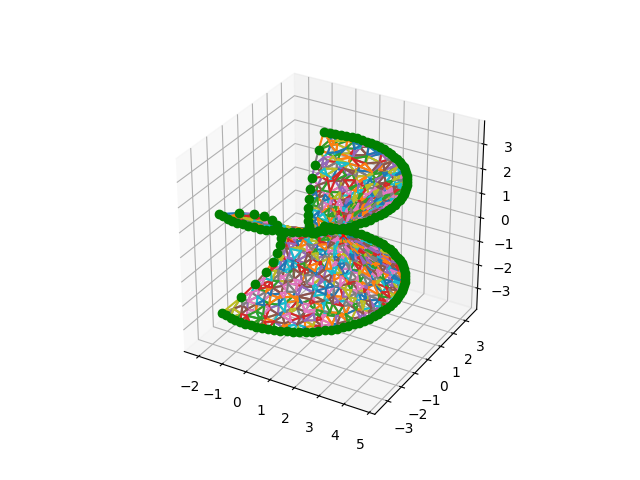

In [12]:
#Drawing the surfaces 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []
for tr in M.triangles:
    xs = [M.mapping[ind][0] for ind in tr] + [M.mapping[tr[0]][0]]
    ys = [M.mapping[ind][1] for ind in tr] + [M.mapping[tr[0]][1]]
    zs = [M.mapping[ind][2] for ind in tr] + [M.mapping[tr[0]][2]]
    ax.plot(xs,ys,zs)
    
    X = X + list(xs)
    Y = Y + list(ys)
    Z = Z + list(zs)


L = M.mapping[ind]
x = L[0]
y = L[1]
z = L[2]


plt.plot(x,y,z,'x',color='r') 



for k in Outside_vertexes:
    L = M.mapping[k]
    x = L[0]
    y = L[1]
    z = L[2]


    plt.plot(x,y,z,'o',color='green') 


# for tr in triangles:
#     print(tr)
    
#     xs = [M.mapping[ind][0] for ind in tr] + [M.mapping[tr[0]][0]]
#     ys = [M.mapping[ind][1] for ind in tr] + [M.mapping[tr[0]][1]]
#     zs = [M.mapping[ind][2] for ind in tr] + [M.mapping[tr[0]][2]]

#     print(xs,ys,zs)

#     ax.plot(xs,ys,zs,color = 'r')
#     X = X + list(xs)
#     Y = Y + list(ys)
#     Z = Z + list(zs)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

